In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#有關韓國瑜的四月報導(Title內含有'韓')
han_post = pd.read_csv('han_post.csv')
han_post.head()

,Date,Push,Title,Author,Link,Content,PushNum,ResNum
0,4/30,27,[轉錄] 韓粉不要看！,littlered112,/bbs/HatePolitics/M.1556639935.A.E03.html,1.轉錄標題︰\r\r\n\r\r\n【Yahoo論壇 / 唐湘龍】韓粉不要看！\r\r\n...,30,65
1,4/30,NaN,[討論] 政黑真的很多假韓粉。,brian21201,/bbs/HatePolitics/M.1556639746.A.F0A.html,政黑真的被滲透了!\r\r\n\r\r\n明明之前很多人挺老韓的啊\r\r\n\r\r\n為...,0,2
2,4/30,13,[討論] 怎麼一個晚上韓總聲勢整個大翻轉？,ray90910,/bbs/HatePolitics/M.1556639689.A.D41.html,小弟今天早上看一下板上\r\r\n韓總還是不少人捧\r\r\n很多人也覺得大概就是韓出線了\...,13,29
3,4/30,3,Re: [轉錄] 韓國瑜逐字稿-如何使台灣安全及統獨分析,coolhon,/bbs/HatePolitics/M.1556639603.A.CA1.html,韓國瑜的話不用討論太多，討論太多只是顯得你愚蠢而已\r\r\n\r\r\n韓喜歡講一些似是而...,4,8
4,4/30,31,[討論] 韓國瑜為啥可以這麼討厭？,rayterzll,/bbs/HatePolitics/M.1556639310.A.AFC.html,如題\r\r\n\r\r\n\r\r\n那張嘴、那個智商、那個自大、那個膨脹\r\r\n\r...,34,77


In [4]:
#choose specific columns

DatePushRes = han_post[['Date', 'PushNum', 'ResNum']]
DatePushRes

,Date,PushNum,ResNum
0,4/30,30,65
1,4/30,0,2
2,4/30,13,29
3,4/30,4,8
4,4/30,34,77
5,4/30,2,5
6,4/30,35,57
7,4/30,2,8
8,4/30,3,18
9,4/30,2,8


# 1 計算推文率(一天內總推/總回覆)

In [5]:
#試做4/30
seg_df = DatePushRes[DatePushRes['Date'] == ' 4/30']
pushSum = sum(seg_df['PushNum'])
resSum = sum(seg_df['ResNum'])
ratio = pushSum/resSum
ratio

0.40208794685226196

In [6]:
#平均函數

def avg_fun(date):
    """取得單日平均推：總回覆的平均"""
    seg_df = DatePushRes[DatePushRes['Date'] == date]
    pushSum = sum(seg_df['PushNum'])
    resSum = sum(seg_df['ResNum'])
    ratio = pushSum/resSum
    
    return ratio

In [7]:
from collections import Counter

date_list = DatePushRes['Date'].tolist()
date_set = set(date_list)
date_set.remove('4/26') #remove item from set
date_list = sorted(list(date_set),key = date_list.index) #sort the set
print(date_list)

[' 4/30', ' 4/29', ' 4/28', ' 4/27', ' 4/26', ' 4/25', ' 4/24', ' 4/23', ' 4/22', ' 4/21', ' 4/20', ' 4/19', ' 4/18', ' 4/17', ' 4/16', ' 4/15', ' 4/14', ' 4/13', ' 4/12', ' 4/11', ' 4/10', ' 4/09', ' 4/08', ' 4/07', ' 4/06', ' 4/05', ' 4/04', ' 4/03', ' 4/02', ' 4/01']


In [8]:
ratio_list = []
for i in date_list:
    ratio_list.append(avg_fun(i))
ratio_list

[0.40208794685226196,
 0.44572474693086367,
 0.4055009389152767,
 0.4042160949022123,
 0.4367558766663275,
 0.4281926646045073,
 0.4351670653040516,
 0.41851307361125695,
 0.42010208087946604,
 0.3892240482629499,
 0.3760052365812605,
 0.4409486166007905,
 0.3781372002230898,
 0.5212950472152631,
 0.37224409448818896,
 0.35994155930402444,
 0.35771762984637895,
 0.3774481840654117,
 0.3592091571279917,
 0.47245017584994137,
 0.414792899408284,
 0.39519827353655246,
 0.4651022864019254,
 0.42198308993082245,
 0.28167069382119436,
 0.3802212689094604,
 0.36321483771251933,
 0.38416666666666666,
 0.41973094170403585,
 0.43208038704875323]

In [13]:
ratio_df = pd.DataFrame()
ratio_list.reverse()
date_list.reverse()
ratio_df['Date'] = date_list
ratio_df['Ratio'] = ratio_list

ratio_df

,Date,Ratio
0,4/01,0.432080
1,4/02,0.419731
2,4/03,0.384167
3,4/04,0.363215
4,4/05,0.380221
5,4/06,0.281671
6,4/07,0.421983
7,4/08,0.465102
8,4/09,0.395198
9,4/10,0.414793


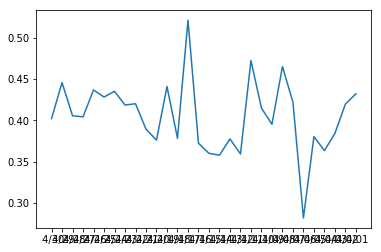

In [9]:
plt.plot(date_list , ratio_list)

# 2 抓出高低峰

C:\Users\Perry\Anaconda3\lib\site-packages\pandas\core\series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


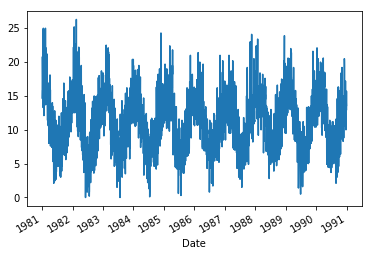

In [10]:
# from pandas import Series
# from matplotlib import pyplot
# series = Series.from_csv('C:/Users/Perry/Desktop/daily-min-temperatures.csv', header=0)
# series.plot()

In [11]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy
import peakutils

In [14]:
table = FF.create_table(ratio_df)
py.iplot(table, filename = 'ratio-dataframe')

C:\Users\Perry\Anaconda3\lib\site-packages\plotly\tools.py:1176: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table

C:\Users\Perry\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [14]:
trace = go.Scatter(
    x = date_list,
    y = ratio_list,
    mode = 'lines'
)

data = [trace]
py.iplot(data, filename = 'ratio-plot')

In [15]:
#高低峰標記
cb = np.array(ratio_list)
cb_inverse = cb * -1
indices1 = peakutils.indexes(cb, thres = 0.678, min_dist = 0.1)
indices2 = peakutils.indexes(cb_inverse, thres = 0.6, min_dist = 0.1)

trace = go.Scatter(
    x = date_list,
    y = ratio_list,
    mode = 'lines',
    name = 'Original Plot'
)

trace2 = go.Scatter(
    x = [date_list[i] for i in indices1],
    y = [ratio_list[j] for j in indices1],
    mode = 'markers',
    marker = dict(
        size = 8,
        color = 'rgb(255,0,0)',
        symbol = 'cross'
    ),
    name = 'High Peaks'
)

trace3 = go.Scatter(
    x = [date_list[i] for i in indices2],
    y = [ratio_list[j] for j in indices2],
    mode = 'markers',
    marker = dict(
        size = 8,
        color = 'rgb(0,255,0)',
        symbol = 'circle'
    ),
    name = 'Low Peaks'
)

data = [trace, trace2, trace3]
py.iplot(data, filename = 'ratio_list-plot-with-peaks')

# 3 對高低峰文章做LDA

In [60]:
#高峰文章dataframe

seg_date = []
for i in indices1:
    seg_date.append(date_list[i])

han_post[han_post['Date'] == seg_date[0]]

max_df = pd.DataFrame()
for i in range(len(seg_date)):
    max_df = pd.concat([max_df , han_post[han_post['Date'] == seg_date[i]]] , axis = 0 , ignore_index = 'True')
    
    
max_df.head()

,Date,Push,Title,Author,Link,Content,PushNum,ResNum
0,4/08,25,[新聞] 高銀董座想接華南金？韓國瑜：慶富案報告,Tapqou,/bbs/HatePolitics/M.1554738587.A.8B5.html,1.新聞網址:\r\r\n\r\r\n2.新聞來源︰\r\r\nUDN\r\r\n\r\r\...,33,67
1,4/08,7,[討論] 政黑韓粉願不願意給朱立倫機會？,alex8725,/bbs/HatePolitics/M.1554736115.A.702.html,如題 至今我仍認為韓國瑜不會出來選總統\r\r\n所以我想問問各位韓粉 在柯文哲不出來的前提...,37,98
2,4/08,4,[討論] 韓國瑜要連任高雄市長的最大障礙,fantasy14,/bbs/HatePolitics/M.1554735763.A.DE7.html,如果韓在2022要選高雄市長 爭取連任\r\r\n台下的韓粉 會怎麼喊？\r\r\n選總統 ...,4,10
3,4/08,4,[討論] 韓如果辭市長需多久時間內補選,cchysw3021,/bbs/HatePolitics/M.1554735549.A.9DE.html,韓國瑜應該會被KMT 徵召選2020總統\r\r\n\r\r\n如果韓願意為專心選2020而...,4,8
4,4/08,14,Re: [新聞] 莊智淵任高雄四月代言人 韓國瑜回應,Lime5566,/bbs/HatePolitics/M.1554723687.A.09B.html,"[很多人大概不知道\r\r\n\r\r\n在Youtube打關鍵字""table tennis...",15,21


In [17]:
#低峰文章dataframe

seg_date = []
for i in indices2:
    seg_date.append(date_list[i])

han_post[han_post['Date'] == seg_date[0]]

min_df = pd.DataFrame()
for i in range(len(seg_date)):
    min_df = pd.concat([min_df , han_post[han_post['Date'] == seg_date[i]]] , axis = 0 , ignore_index = 'True')
    
    
min_df.head()

,Date,Push,Title,Author,Link,Content,PushNum,ResNum
0,4/04,3,Re: [討論] 韓國瑜：柯P認真，但零效果,KingChang711,/bbs/HatePolitics/M.1554393090.A.6F4.html,: 柯屁整天在那邊觀察民調，做個變色龍，令人不恥，還以為自己是選舉專家，大數據專家\r\r\...,7,18
1,4/04,17,Re: [討論] 韓國瑜：柯P認真，但零效果,yftsai,/bbs/HatePolitics/M.1554392287.A.EF7.html,: 堪稱藍營最強總統候選人的高雄市長韓國瑜，最近接受媒體訪問時妙語評論「對手們」，\r\r\...,18,70
2,4/04,NaN,Re: [討論] 韓國瑜：柯P認真，但零效果,YAYA6655,/bbs/HatePolitics/M.1554392177.A.BE1.html,柯屁整天在那邊觀察民調，做個變色龍，令人不恥，還以為自己是選舉專家，大數據專家\r\r\n。...,0,3
3,4/04,NaN,[討論] 韓國瑜2020已完全無望確定GG,alex8725,/bbs/HatePolitics/M.1554391926.A.1D2.html,雖然講過很多次了\r\r\n但這次認真的講一下GG的理由\r\r\n1.很多朋友提到，高雄滿...,19,52
4,4/04,NaN,Re: [轉貼] 韓國瑜-我的職場經驗,jacklyl,/bbs/HatePolitics/M.1554391003.A.07E.html,這篇真的是很棒的文章\r\r\n\r\r\n經歷過實事的人才說的出來的經驗\r\r\n\r\...,5,34


In [18]:
import time
import jieba
import jieba.analyse

## 高峰LDA

In [19]:
max_content = list(max_df['Content'])
max_title = list(max_df['Title'])

In [93]:
#import self_defined stop_list
punctuation = [line.strip() for line in open('標點符號.txt','r+')]
stop_list = punctuation + [line.strip() for line in open('停用詞.txt','r+', encoding = 'utf-8')]
stop_list.extend(['\n', '\r', '\u3000'])

for stopword in stop_list:
    max_content = [word.replace(stopword, '') for word in max_content]

clean_word = []
for i in range(len(max_content)):
    clean_word.append([])
    for k in jieba.cut(max_content[i].strip(), cut_all = False):
        clean_word[i].append(k)
# stop_list

In [94]:
#看一下切詞結果

df = pd.DataFrame()
df['Title'] = max_title
df['Seg_Content'] = clean_word

df.head()

,Title,Seg_Content
0,[新聞] 高銀董座想接華南金？韓國瑜：慶富案報告,"[新聞, 網址, 新聞源, UDN, 新聞容, 財政部, 日前, 發布事, 命令, 派, 高..."
1,[討論] 政黑韓粉願不願意給朱立倫機會？,"[題認, 韓國瑜會, 選總統, 想問, 問位, 韓粉, 柯文, 哲, 前提, 國民黨, 推出..."
2,[討論] 韓國瑜要連任高雄市長的最大障礙,"[果, 韓選, 高雄市, 長, 爭取, 台, 韓粉, 會, 喊, 選總統, 選總統, 選總統..."
3,[討論] 韓如果辭市長需多久時間內補選,"[韓國瑜, 應會, KMT, 徵召, 選總統果, 韓願意, 專心, 選辭, 市長, 請問, ..."
4,Re: [新聞] 莊智淵任高雄四月代言人 韓國瑜回應,"[概, 知道, Youtube, 關鍵, 字, tabletennis, 裡面, 觀次, 數..."


In [66]:
import gensim, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from pprint import pprint

In [95]:
# Create Dictionary
id2word = corpora.Dictionary(clean_word)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in clean_word]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, 
                                           random_state=100, update_every=1, chunksize=10,
                                           passes=10, alpha='symmetric', iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.011*"韓導" + 0.007*"郭" + 0.007*"…" + 0.006*"越" + 0.005*"韓粉" + 0.004*"堆" + '
  '0.004*"ptt" + 0.003*"草根" + 0.003*"攻擊" + 0.003*"垃圾"'),
 (1,
  '0.012*"柯文" + 0.010*"出版" + 0.010*"公益" + 0.008*"柯" + 0.008*"黃" + 0.007*"沒" + '
  '0.007*"光芹" + 0.006*"李佳芬" + 0.005*"P" + 0.005*"問題"'),
 (2,
  '0.044*"韓國瑜" + 0.017*"說" + 0.017*"長" + 0.016*"高雄市" + 0.014*"總統" + 0.012*"參選" '
  '+ 0.010*"會" + 0.009*"韓粉" + 0.008*"挺" + 0.008*"支持"'),
 (3,
  '0.009*"韓冰" + 0.009*"韓誓" + 0.007*"日" + 0.007*"出席" + 0.007*"新聞" + 0.007*"舉辦" '
  '+ 0.007*"鳳山" + 0.006*"時間" + 0.005*"飯" + 0.005*"台灣"')]


In [65]:
# !pip install pyLDAvis

  Using cached https://files.pythonhosted.org/packages/a5/3a/af82e070a8a96e13217c8f362f9a73e82d61ac8fff3a2561946a97f96266/pyLDAvis-2.1.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/cd/c1/50a758e8247561e58cb87305b1e90b171b8c767b15b12a1734001f41d356/joblib-0.13.2-py2.py3-none-any.whl
  Running setup.py bdist_wheel for pyLDAvis: started
  Running setup.py bdist_wheel for pyLDAvis: finished with status 'done'
  Stored in directory: C:\Users\Perry\AppData\Local\pip\Cache\wheels\98\71\24\513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [24]:
import gensim
from gensim import models
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [96]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.226032 -0.070013       1        1  43.091305
0      0.113621 -0.021469       2        1  21.450731
1      0.119087 -0.101579       3        1  20.523438
3     -0.006676  0.193062       4        1  14.934525, topic_info=      Category        Freq   Term       Total  loglift  logprob
term                                                           
143    Default  965.000000    韓國瑜  965.000000  30.0000  30.0000
201    Default  299.000000     總統  299.000000  29.0000  29.0000
137    Default  385.000000      長  385.000000  28.0000  28.0000
150    Default  375.000000    高雄市  375.000000  27.0000  27.0000
1504   Default  267.000000     參選  267.000000  26.0000  26.0000
117    Default  402.000000      說  402.000000  25.0000  25.0000
3367   Default  121.000000     韓導  121.000000  24.0000  24.0000
167    Default  142.000000     柯文  142.000000  23.0000  23.0000
16321  Default  103.000000     出版  103.000000  22.0000  22.0000
14252  Default  101.000000     公益  101.000000  21.0000  21.0000
1524   Default   88.000000      柯   88.000000  20.0000  20.0000
962    Default   72.000000     韓冰   72.000000  19.0000  19.0000
233    Default  168.000000     支持  168.000000  18.0000  18.0000
1389   Default  168.000000      挺  168.000000  17.0000  17.0000
16111  Default   71.000000     韓誓   71.000000  16.0000  16.0000
213    Default  164.000000      做  164.000000  15.0000  15.0000
149    Default  160.000000     高雄  160.000000  14.0000  14.0000
3205   Default   81.000000      黃   81.000000  13.0000  13.0000
366    Default  103.000000      日  103.000000  12.0000  12.0000
194    Default  240.000000      會  240.000000  11.0000  11.0000
5595   Default   90.000000      郭   90.000000  10.0000  10.0000
176    Default  260.000000     韓粉  260.000000   9.0000   9.0000
7297   Default   69.000000     光芹   69.000000   8.0000   8.0000
2103   Default   70.000000      越   70.000000   7.0000   7.0000
863    Default  131.000000      錢  131.000000   6.0000   6.0000
82     Default  172.000000      沒  172.000000   5.0000   5.0000
62     Default   54.000000     新聞   54.000000   4.0000   4.0000
888    Default   56.000000     出席   56.000000   3.0000   3.0000
70     Default   91.000000     時間   91.000000   2.0000   2.0000
937    Default   52.000000     舉辦   52.000000   1.0000   1.0000
...        ...         ...    ...         ...      ...      ...
470     Topic4   51.227364     鳳山   52.609665   1.8749  -5.0005
11977   Topic4   25.263731     力求   25.951595   1.8746  -5.7074
11987   Topic4   25.263731  執政國民黨   25.951595   1.8746  -5.7074
12054   Topic4   25.263731     計失   25.951595   1.8746  -5.7074
11821   Topic4   25.404158     希見   26.096283   1.8746  -5.7019
1299    Topic4   24.114193   LIVE   24.805437   1.8732  -5.7540
4991    Topic4   27.397835     政客   28.195637   1.8728  -5.6263
28      Topic4   23.797373     安全   24.518188   1.8717  -5.7672
735     Topic4   21.981770     民錢   22.668186   1.8707  -5.8466
115     Topic4   21.791409      註   22.472874   1.8707  -5.8553
51      Topic4   21.579044     心想   22.257790   1.8705  -5.8650
11840   Topic4   22.025043     稍安   22.717968   1.8705  -5.8446
105     Topic4   21.493574     網址   22.172272   1.8704  -5.8690
139     Topic4   21.222019      附   21.903048   1.8699  -5.8817
5741    Topic4   19.950611      勿   20.653536   1.8669  -5.9435
876     Topic4   19.451387      』   20.139906   1.8667  -5.9689
3349    Topic4   17.531412     晚間   18.223040   1.8628  -6.0728
102     Topic4   24.479418     突然   25.498810   1.8607  -5.7389
888     Topic4   53.547680     出席   56.334438   1.8508  -4.9562
3420    Topic4   22.791435      明   23.828882   1.8570  -5.8104
16651   Topic4   37.864532    師會路   45.365372   1.7208  -5.3028
4127    Topic4   22.250439      費   23.281185   1.8562  -5.8344
366     Topic4   56.153809      日  103.812119   1.2870  -4.9087
70      Topic4   48.639153     時間   91.561264   1

## 低峰LDA

In [74]:
min_content = list(min_df['Content'])
min_title = list(min_df['Title'])

In [89]:
for stopword in stop_list:
    min_content = [word.replace(stopword, '') for word in min_content]

clean_word = []
for i in range(len(min_content)):
    clean_word.append([])
    for k in jieba.cut(min_content[i].strip(), cut_all = False):
        clean_word[i].append(k)

In [90]:
#看一下切詞結果

df = pd.DataFrame()
df['Title'] = min_title
df['Seg_Content'] = clean_word

df.head()

,Title,Seg_Content
0,Re: [討論] 韓國瑜：柯P認真，但零效果,"[柯屁, 整天, 觀察民調, 做, 變色, 龍令恥, 選舉, 專家數, 專家, , , ..."
1,Re: [討論] 韓國瑜：柯P認真，但零效果,"[堪稱, 藍營強, 總統候, 選, 高雄市, 長, 韓國瑜, 近, 接受, 媒體訪, 問時,..."
2,Re: [討論] 韓國瑜：柯P認真，但零效果,"[柯屁, 整天, 觀察民調, 做, 變色, 龍令恥, 選舉, 專家數, 專家, 韓國瑜, 講..."
3,[討論] 韓國瑜2020已完全無望確定GG,"[然講, 次次, 認真講, GG, 理, 朋友, 提高, 雄滿, 意度, 明顯, 陳, 菊放..."
4,Re: [轉貼] 韓國瑜-我的職場經驗,"[篇, 真棒, 文章, 歷實事, 說驗, 韓總真然, 酸點, 堆, 細細, 挖掘, 棒, 容..."


In [91]:
# Create Dictionary
id2word = corpora.Dictionary(clean_word)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in clean_word]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, 
                                           random_state=100, update_every=1, chunksize=10,
                                           passes=10, alpha='symmetric', iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.007*"幹幹" + 0.004*"前面" + 0.003*"親民" + 0.003*"妓女" + 0.002*"買" + 0.002*"水扁" '
  '+ 0.002*"狗" + 0.002*"審判" + 0.002*"公堂" + 0.002*"目標"'),
 (1,
  '0.451*" " + 0.003*"實" + 0.002*"中立" + 0.002*"馬" + 0.002*"DPP" + 0.001*"樣" + '
  '0.001*"沒兵" + 0.001*"政績" + 0.001*"郭董" + 0.001*"執政"'),
 (2,
  '0.016*"韓國瑜" + 0.016*"說" + 0.014*"韓粉" + 0.010*"拱" + 0.009*"支持" + 0.008*"郭" + '
  '0.008*"想" + 0.007*"總統" + 0.007*"沒" + 0.007*"會"'),
 (3,
  '0.015*"韓國瑜" + 0.009*"說" + 0.008*"台灣" + 0.006*"媒體" + 0.006*"長" + 0.006*"話" + '
  '0.005*"蔡" + 0.005*"表示" + 0.005*"高雄市" + 0.005*"馬"')]


In [92]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.206091 -0.095037       1        1  34.114136
2      0.173790 -0.138605       2        1  32.093128
3      0.071525  0.123397       3        1  26.341215
0     -0.039224  0.110245       4        1   7.451519, topic_info=      Category          Freq  Term         Total  loglift  logprob
term                                                              
0      Default  17540.000000        17540.000000  30.0000  30.0000
2791   Default    521.000000    韓粉    521.000000  29.0000  29.0000
58     Default   1059.000000   韓國瑜   1059.000000  28.0000  28.0000
44     Default    893.000000     說    893.000000  27.0000  27.0000
3410   Default    353.000000     拱    353.000000  26.0000  26.0000
2429   Default    335.000000    支持    335.000000  25.0000  25.0000
6481   Default    304.000000     郭    304.000000  24.0000  24.0000
86     Default    254.000000    台灣    254.000000  23.0000  23.0000
819    Default    303.000000     想    303.000000  22.0000  22.0000
1967   Default    188.000000    媒體    188.000000  21.0000  21.0000
2617   Default    218.000000    徵召    218.000000  20.0000  20.0000
2608   Default    200.000000   國民黨    200.000000  19.0000  19.0000
4696   Default    199.000000   郭台銘    199.000000  18.0000  18.0000
40     Default    368.000000    總統    368.000000  17.0000  17.0000
51     Default    189.000000     選    189.000000  16.0000  16.0000
2382   Default    155.000000    表示    155.000000  15.0000  15.0000
2590   Default    178.000000    初選    178.000000  14.0000  14.0000
32     Default    360.000000     沒    360.000000  13.0000  13.0000
130    Default    340.000000     會    340.000000  12.0000  12.0000
1256   Default    171.000000    立委    171.000000  11.0000  11.0000
135    Default    142.000000    柯文    142.000000  10.0000  10.0000
55     Default    393.000000     長    393.000000   9.0000   9.0000
6      Default    156.000000     做    156.000000   8.0000   8.0000
1432   Default    245.000000     話    245.000000   7.0000   7.0000
1213   Default    305.000000    知道    305.000000   6.0000   6.0000
7342   Default     60.000000    幹幹     60.000000   5.0000   5.0000
18981  Default    152.000000    軍隊    152.000000   4.0000   4.0000
2598   Default    137.000000    參選    137.000000   3.0000   3.0000
60     Default    364.000000   高雄市    364.000000   2.0000   2.0000
508    Default    114.000000     句    114.000000   1.0000   1.0000
...        ...           ...   ...           ...      ...      ...
2015    Topic4      5.081707    然次      6.050019   2.4223  -7.4222
14326   Topic4      5.873463    沒進      7.008930   2.4200  -7.2774
8939    Topic4      4.579723    福島      5.506749   2.4124  -7.5262
9132    Topic4      6.574904    金山      7.937492   2.4084  -7.1646
627     Topic4      4.970110     女      6.051359   2.3999  -7.4444
1350    Topic4      7.991876     花      9.745243   2.3984  -6.9695
26      Topic4      3.976076     書      4.915071   2.3847  -7.6676
8896    Topic4      4.066212    核災      5.026741   2.3847  -7.6452
47      Topic4      4.596474    資源      5.685353   2.3841  -7.5226
8899    Topic4      4.051134   核電廠      5.015407   2.3832  -7.6489
1077    Topic4      8.165824  溫良恭儉     10.128701   2.3813  -6.9479
546     Topic4      3.949384     員      4.916091   2.3778  -7.6743
22125   Topic4     14.499408    講理     18.256439   2.3663  -6.3738
19283   Topic4      6.349584    裝備      8.086629   2.3549  -7.1995
23977   Topic4     11.363791    菊花     15.452974   2.2894  -6.6174
21989   Topic4      6.472880   十七年      8.378594   2.3387  -7.1803
23976   Topic4      6.815210    美名      8.946835   2.3246  -7.1287
14768   Topic4     11.438435     溜     17.151535   2.1916  -6.6109
8505    Topic4     24.898952    妓女     45.663712   1.9903  -5.8331
11893   Topic4      7.751431   百分百     11.101310   2.2376  -7.0000
16760   Topic4     10.395644    淺色     17.514652   2.0751  -6.7065
23913   Topic4 